Following the instructions from https://pypi.org/project/python-steam-api/. I got my Steam API key from https://pypi.org/project/python-steam-api/ and pasted it into a text file.

In [1]:
from steam import Steam
from decouple import config

with open("myapikey.txt", "r") as file:
    myapikey=file.read()
    
import os
os.environ["STEAM_API_KEY"] = myapikey
KEY = config("STEAM_API_KEY")
steam = Steam(KEY)

In [ ]:
testuser="steamusername"
steam.users.search_user(testuser)

In [3]:
testid=steam.users.search_user(testuser)['player']['steamid']
testid

'76561198039393086'

In [ ]:
testfl=steam.users.get_user_friends_list(testid)
testfl

In [5]:
testflids=[]

for i in range(len(testfl['friends'])):
    testflids.append(testfl['friends'][i]['steamid'])
    
testflids

#yeah there's probably a way to do it with list comprehension

['76561198024952241',
 '76561198063841652',
 '76561198167166225',
 '76561198089121952',
 '76561198009190429',
 '76561198044477096',
 '76561198018947486',
 '76561198052932070',
 '76561197993353177',
 '76561198015023147',
 '76561198007701968',
 '76561198050495521',
 '76561198007395908',
 '76561198055623603',
 '76561198041103618',
 '76561197996430741',
 '76561197995248893',
 '76561198284261819',
 '76561198052390135',
 '76561198014795926',
 '76561198025017304',
 '76561198076172962',
 '76561198048895718',
 '76561198010127100',
 '76561198074139361',
 '76561198042351806']

In [6]:
testgamelist=steam.users.get_user_recently_played_games(testid)
#for the full list should use steam.users.get_owned_games(testid)

testgamelist

{'total_count': 3,
 'games': [{'appid': 524220,
   'name': 'NieR:Automata™',
   'playtime_2weeks': 73,
   'playtime_forever': 769,
   'img_icon_url': 'ec431ecb2a5178c5a01bb15550f112f93af029bb',
   'playtime_windows_forever': 769,
   'playtime_mac_forever': 0,
   'playtime_linux_forever': 0},
  {'appid': 1794680,
   'name': 'Vampire Survivors',
   'playtime_2weeks': 33,
   'playtime_forever': 819,
   'img_icon_url': 'b09d9a388f5328ec977f7b45228ac8ae21a78c55',
   'playtime_windows_forever': 819,
   'playtime_mac_forever': 0,
   'playtime_linux_forever': 0},
  {'appid': 39210,
   'name': 'FINAL FANTASY XIV Online',
   'playtime_2weeks': 1,
   'playtime_forever': 75090,
   'img_icon_url': '98527a5229540d86ced171d8a5dff2f8a560fe80',
   'playtime_windows_forever': 71940,
   'playtime_mac_forever': 0,
   'playtime_linux_forever': 0}]}

In [7]:
hoursplayed=[]

for i in range(testgamelist['total_count']):
    hoursplayed.append(testgamelist['games'][i]['playtime_2weeks'])
    
hoursplayed

[73, 33, 1]

In [8]:
for friend in testflids:
    testgamelist2=steam.users.get_user_recently_played_games(friend)
    if testgamelist2=={}: #these users might not have been on recently?
        continue
    if testgamelist2['total_count']>0:
        for i in range(testgamelist2['total_count']):
            hoursplayed.append(testgamelist2['games'][i]['playtime_2weeks'])
        
hoursplayed

[73,
 33,
 1,
 2214,
 68,
 22,
 2501,
 1540,
 82,
 61,
 904,
 411,
 109,
 29,
 256,
 209,
 63,
 40,
 16,
 679,
 10,
 1871,
 1086,
 77,
 8818,
 1220,
 955,
 232,
 668,
 497,
 37,
 3062,
 1292,
 474,
 1,
 7,
 405,
 360,
 359,
 12,
 3861,
 128,
 37,
 1,
 627,
 2754,
 1071,
 6,
 1229,
 473,
 390,
 154,
 61,
 13,
 2339]

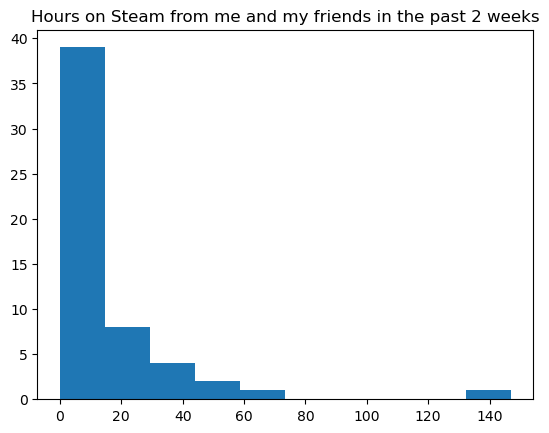

In [9]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
plt.hist(np.asarray(hoursplayed)/60)
plt.title('Hours on Steam from me and my friends in the past 2 weeks')
plt.show()

In [ ]:
teststeamlib=steam.users.get_owned_games(testid)

teststeamlib

In [11]:
steam.apps.get_app_details(teststeamlib['games'][0]['appid'])
# oof does this return one long string?

'{"70": {"success": true, "data": {"type": "game", "name": "Half-Life", "steam_appid": 70, "required_age": 0, "is_free": false, "dlc": [323130], "detailed_description": "Named Game of the Year by over 50 publications, Valve\'s debut title blends action and adventure with award-winning technology to create a frighteningly realistic world where players must think to survive. Also includes an exciting multiplayer mode that allows you to play against friends and enemies around the world.", "about_the_game": "Named Game of the Year by over 50 publications, Valve\'s debut title blends action and adventure with award-winning technology to create a frighteningly realistic world where players must think to survive. Also includes an exciting multiplayer mode that allows you to play against friends and enemies around the world.", "short_description": "Named Game of the Year by over 50 publications, Valve\'s debut title blends action and adventure with award-winning technology to create a frighten

Functions that I can't get to work:

In [ ]:
steam.apps.get_user_stats("<steam_id>", "<app_id>")